# Generalization with OOP: The MLBacktester Class

## Using the MLBacktester Class

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/var/folders/k8/xm42xp_16cs6fgtvp6ymr9l40000gn/T/ipykernel_48727/405297443.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
df = pd.read_csv("five_minute_pairs.csv", parse_dates = ["time"], index_col = "time")
df.head()

,EURUSD,GBPUSD,EURAUD
time,,,
2019-01-01 22:00:00+00:00,1.14658,1.27468,1.62623
2019-01-01 22:05:00+00:00,1.14635,1.27427,1.62617
2019-01-01 22:10:00+00:00,1.14632,1.27476,1.62629
2019-01-01 22:15:00+00:00,1.14632,1.27477,1.62629
2019-01-01 22:20:00+00:00,1.14653,1.27476,1.62562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124056 entries, 2019-01-01 22:00:00+00:00 to 2020-08-30 23:55:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EURUSD  123350 non-null  float64
 1   GBPUSD  123169 non-null  float64
 2   EURAUD  123742 non-null  float64
dtypes: float64(3)
memory usage: 3.8 MB


In [4]:
import MLBacktester as MLB

### EURUSD

In [13]:
symbol = "EURUSD"

In [14]:
ptc = 0.00007

In [40]:
ml = MLB.MLBacktester(symbol, "2019-01-01", "2020-08-31", ptc)

In [41]:
ml

MLBacktester(symbol = EURUSD, start = 2019-01-01, end = 2020-08-31, tc = 7e-05)

In [42]:
ml.data.tail()

,price,returns
time,,
2020-08-30 23:35:00+00:00,1.190895,-0.000080
2020-08-30 23:40:00+00:00,1.191240,0.000290
2020-08-30 23:45:00+00:00,1.191515,0.000231
2020-08-30 23:50:00+00:00,1.191685,0.000143
2020-08-30 23:55:00+00:00,1.191715,0.000025


In [43]:
ml.test_strategy(train_ratio = 0.7, lags = 5)

(0.176822, -0.893132)

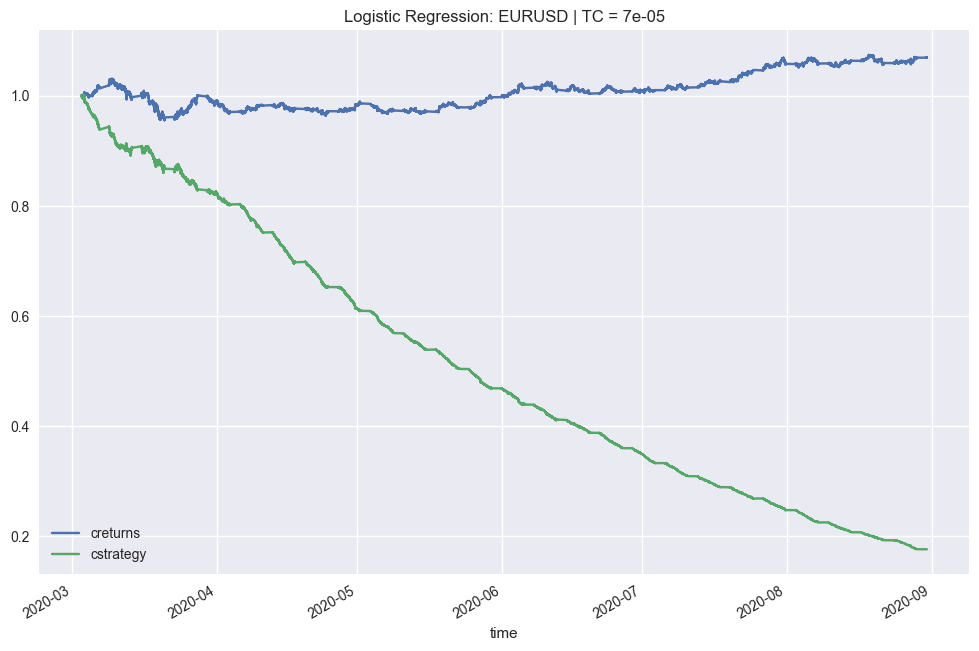

In [44]:
ml.plot_results() # 너무 많은 거래로 인해 오히려 손실이 발생하였다. (거래손실)

In [38]:
ml.results.head()

,price,returns,lag1,lag2,lag3,lag4,lag5,pred,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,,
2020-03-03 00:20:00+00:00,1.113645,-0.000139,-0.000206,-0.000135,-0.000265,0.000027,0.000058,1.0,-0.000139,0.0,0.999861,0.999861
2020-03-03 00:25:00+00:00,1.113745,0.000090,-0.000139,-0.000206,-0.000135,-0.000265,0.000027,1.0,0.000090,0.0,0.999951,0.999951
2020-03-03 00:30:00+00:00,1.113755,0.000009,0.000090,-0.000139,-0.000206,-0.000135,-0.000265,1.0,0.000009,0.0,0.999960,0.999960
2020-03-03 00:35:00+00:00,1.113770,0.000013,0.000009,0.000090,-0.000139,-0.000206,-0.000135,1.0,0.000013,0.0,0.999973,0.999973
2020-03-03 00:40:00+00:00,1.113450,-0.000287,0.000013,0.000009,0.000090,-0.000139,-0.000206,1.0,-0.000287,0.0,0.999686,0.999686


__The optimal Number of Lags__

In [39]:
for lags in range(1, 21):
    print(lags, ml.test_strategy(train_ratio = 0.7, lags = lags))

1 (1.288633, 0.219298)
2 (1.286446, 0.21714)
3 (1.216406, 0.146817)
4 (1.32749, 0.257757)
5 (1.333395, 0.263441)
6 (1.288601, 0.218498)
7 (1.282079, 0.212072)
8 (1.280877, 0.21088)
9 (1.355576, 0.285593)
10 (1.300582, 0.230291)
11 (1.335061, 0.264679)
12 (1.316419, 0.245975)
13 (1.325799, 0.255321)
14 (1.274767, 0.20412)
15 (1.260055, 0.189303)
16 (1.283069, 0.211744)
17 (1.269056, 0.197616)
18 (1.294975, 0.223996)
19 (1.316893, 0.246045)
20 (1.333242, 0.262331)


In [32]:
ml.results.trades.value_counts()

0.0    22711
2.0    14275
Name: trades, dtype: int64

### EURAUD

In [45]:
symbol = "EURAUD"

In [46]:
ml = MLB.MLBacktester(symbol, "2019-01-01", "2020-08-31", 0)

In [47]:
ml.test_strategy(train_ratio = 0.7, lags = 15)

(1.830543, 0.881757)

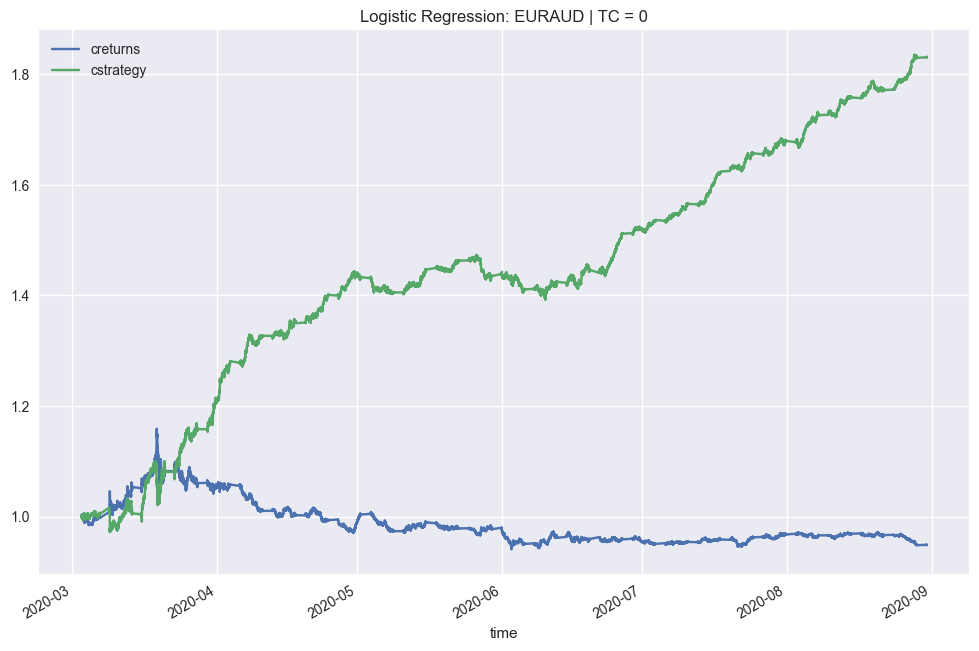

In [48]:
ml.plot_results()

__The optimal Number of Lags__

In [49]:
for lags in range(1, 21):
    print(lags, ml.test_strategy(train_ratio = 0.7, lags = lags))

1 (1.618959, 0.669992)
2 (1.700957, 0.751976)
3 (1.688437, 0.738829)
4 (1.678823, 0.729776)
5 (1.568475, 0.619141)
6 (1.608623, 0.659603)
7 (1.609968, 0.660825)
8 (1.621555, 0.672797)
9 (1.677693, 0.729174)
10 (1.589426, 0.640069)
11 (1.669541, 0.720298)
12 (1.717291, 0.768219)
13 (1.758792, 0.809989)
14 (1.786919, 0.838177)
15 (1.830543, 0.881757)
16 (1.702411, 0.753792)
17 (1.610886, 0.662314)
18 (1.649278, 0.700481)
19 (1.670748, 0.721605)
20 (1.751434, 0.80169)


In [54]:
ml.results.head()

,price,returns,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,...,lag16,lag17,lag18,lag19,lag20,pred,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,,,,,,,,,,,
2020-03-02 23:55:00+00:00,1.701685,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,0.000176,-0.000047,0.000065,0.000285,...,-0.000302,0.000590,-0.000660,-0.000015,-0.000414,1.0,-0.000482,0.0,0.999518,0.999518
2020-03-03 00:00:00+00:00,1.703020,0.000784,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,0.000176,-0.000047,0.000065,...,0.000332,-0.000302,0.000590,-0.000660,-0.000015,1.0,0.000784,0.0,1.000302,1.000302
2020-03-03 00:05:00+00:00,1.703940,0.000540,0.000784,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,0.000176,-0.000047,...,-0.000129,0.000332,-0.000302,0.000590,-0.000660,-1.0,-0.000540,2.0,1.000843,0.999762
2020-03-03 00:10:00+00:00,1.703895,-0.000026,0.000540,0.000784,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,0.000176,...,0.000405,-0.000129,0.000332,-0.000302,0.000590,-1.0,0.000026,0.0,1.000816,0.999789
2020-03-03 00:15:00+00:00,1.703560,-0.000197,-0.000026,0.000540,0.000784,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,...,0.000252,0.000405,-0.000129,0.000332,-0.000302,-1.0,0.000197,0.0,1.000620,0.999985


In [55]:
hits = np.sign(ml.results.returns * ml.results.pred).value_counts()
hits

 1.0    19238
-1.0    17725
 0.0      141
dtype: int64

In [56]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5184885726606295